In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%%html
<style>
table,td,tr,th {border:none!important}
</style>

In [1]:
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, GridspecLayout, Layout
from IPython.display import display, Image, HTML
import insert_data
import present_results
import search_functions
import nltk.data

HOST = 'http://localhost:9200/'
es = Elasticsearch(hosts=[HOST])
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [6]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
logo = present_results.generate_logo('logo.png')
filters = present_results.generate_button('Submit')
expert_mode = present_results.generate_checkbox('expert_mode')
authors = present_results.generate_textbox('authors')
title = present_results.generate_textbox('title')
abstract = present_results.generate_textbox('abstract')
paper_text = present_results.generate_textbox('paper text')
year_slider = present_results.generate_slider('year range',(1987, 2018, 1))
main_search = present_results.generate_textbox('', 'Search for papers')

GridspecLayout(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xf7\x00\x00\x03\xca\x08…

Output()

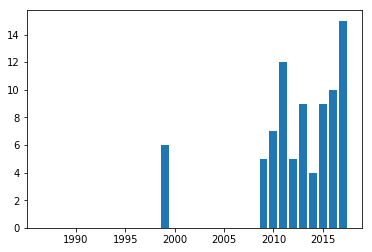

In [6]:
output_mainsearch = widgets.Text()
output_Authors = widgets.Text()
output_Title = widgets.Text()
output_Abstract = widgets.Text()
output_Paper_text = widgets.Text()
output_Year = widgets.SelectionRangeSlider(options = [i for i in range(1987,2018,1)])

out = widgets.Output()
@out.capture(clear_output=True,wait=True)
def submit_search(sender):
    output_mainsearch.value = main_search.value
    output_Authors.value = authors.value
    output_Abstract.value = abstract.value
    output_Title.value = title.value
    output_Paper_text.value = paper_text.value
    output_Year.value = year_slider.value
    if output_mainsearch.value == '':
        pass
    else:
        present_results.print_results(es, sent_detector, output_mainsearch.value, 
                                      [output_Authors.value, output_Title.value, 
                                       output_Abstract.value, output_Paper_text.value], 
                                      years=output_Year.value, complex_search=expert_mode.value)

@out.capture(clear_output=True,wait=True)
def filter_search(sender):
    output_mainsearch.value = main_search.value
    output_Authors.value = authors.value
    output_Abstract.value = abstract.value
    output_Title.value = title.value
    output_Paper_text.value = paper_text.value
    output_Year.value = year_slider.value
    present_results.print_results(es, sent_detector, output_mainsearch.value, 
                                  [output_Authors.value, output_Title.value, 
                                   output_Abstract.value, output_Paper_text.value], 
                                  years=output_Year.value, complex_search=expert_mode.value)
    
main_search.on_submit(submit_search)
filters.on_click(filter_search)
title.on_submit(filter_search)
authors.on_submit(filter_search)
abstract.on_submit(filter_search)
paper_text.on_submit(filter_search)

grid = GridspecLayout(7, 6)
grid[1, 0] = logo
grid[1, 2] = main_search
grid[1, 3] = expert_mode
grid[1, 4] = authors
grid[2, 4] = title
grid[3, 4] = abstract
grid[4, 4] = paper_text
grid[5, 4] = year_slider
grid[6, 4] = filters
display(grid, out)